##### Importing the required libraries

In [5]:
import pandas as pd

###### Loadig the bioactivity_preprocessed data

In [6]:
df=pd.read_csv('data/bioactivity_preprocessed_data3.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,inactive
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,inactive
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,inactive
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,inactive
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,inactive
...,...,...,...,...
1070,CHEMBL4440832,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Oc1ccc2cc(O)c...,990.0,Intermediate
1071,CHEMBL4440832,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Oc1ccc2cc(O)c...,3200.0,Intermediate
1072,CHEMBL3741422,N=C(N)NCCC[C@H](NC(=O)c1ccccc1)C(=O)N[C@@H](CC...,680.0,inactive
1073,CHEMBL4640386,CCCCCC(=O)N[C@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OCc...,4900.0,Intermediate


#### Calculate Lipinski descriptors

###### Import libraries

In [7]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors,Lipinski

#### Calculate descriptors

In [8]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    return descriptors
    
   

In [9]:
df_lipinski=lipinski(df['canonical_smiles'])

In [10]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,240.262,2.80020,0.0,4.0
1,268.224,2.44040,1.0,4.0
2,407.426,1.38560,1.0,5.0
3,306.277,3.84800,1.0,5.0
4,372.772,2.36698,0.0,8.0
...,...,...,...,...
1070,444.468,5.61090,4.0,7.0
1071,444.468,5.61090,4.0,7.0
1072,644.777,1.58387,8.0,7.0
1073,587.639,5.41160,4.0,5.0


In [11]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,inactive
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,inactive
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,inactive
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,inactive
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,inactive
...,...,...,...,...
1070,CHEMBL4440832,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Oc1ccc2cc(O)c...,990.0,Intermediate
1071,CHEMBL4440832,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Oc1ccc2cc(O)c...,3200.0,Intermediate
1072,CHEMBL3741422,N=C(N)NCCC[C@H](NC(=O)c1ccccc1)C(=O)N[C@@H](CC...,680.0,inactive
1073,CHEMBL4640386,CCCCCC(=O)N[C@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OCc...,4900.0,Intermediate


In [12]:
df_combined=pd.concat([df,df_lipinski],axis=1)

In [13]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,100000.0,inactive,240.262,2.80020,0.0,4.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,12310.0,inactive,268.224,2.44040,1.0,4.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,100000.0,inactive,407.426,1.38560,1.0,5.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,50970.0,inactive,306.277,3.84800,1.0,5.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,100000.0,inactive,372.772,2.36698,0.0,8.0
...,...,...,...,...,...,...,...,...
1070,CHEMBL4440832,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Oc1ccc2cc(O)c...,990.0,Intermediate,444.468,5.61090,4.0,7.0
1071,CHEMBL4440832,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Oc1ccc2cc(O)c...,3200.0,Intermediate,444.468,5.61090,4.0,7.0
1072,CHEMBL3741422,N=C(N)NCCC[C@H](NC(=O)c1ccccc1)C(=O)N[C@@H](CC...,680.0,inactive,644.777,1.58387,8.0,7.0
1073,CHEMBL4640386,CCCCCC(=O)N[C@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OCc...,4900.0,Intermediate,587.639,5.41160,4.0,5.0


#### Convert IC50 to pIC50

In [14]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [15]:
df_combined.standard_value.describe()

count      1075.000000
mean      50695.572093
std       30855.403538
min         400.000000
25%       27065.000000
50%       43660.000000
75%       75770.000000
max      121900.000000
Name: standard_value, dtype: float64

In [16]:
-np.log10( (10**-9)* 100000000 )

1.0

In [17]:
-np.log10( (10**-9)* 10000000000 )


-1.0

In [18]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [19]:
df_norm=norm_value(df_combined)
df_norm

C:\Users\Jayaprakash\anaconda3\envs\bioenv\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,100000.0
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,12310.0
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,100000.0
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,50970.0
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,100000.0
...,...,...,...,...,...,...,...,...
1070,CHEMBL4440832,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Oc1ccc2cc(O)c...,Intermediate,444.468,5.61090,4.0,7.0,990.0
1071,CHEMBL4440832,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Oc1ccc2cc(O)c...,Intermediate,444.468,5.61090,4.0,7.0,3200.0
1072,CHEMBL3741422,N=C(N)NCCC[C@H](NC(=O)c1ccccc1)C(=O)N[C@@H](CC...,inactive,644.777,1.58387,8.0,7.0,680.0
1073,CHEMBL4640386,CCCCCC(=O)N[C@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OCc...,Intermediate,587.639,5.41160,4.0,5.0,4900.0


In [20]:
df_final=pIC50(df_norm)
df_final

C:\Users\Jayaprakash\anaconda3\envs\bioenv\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,4.000000
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,4.909742
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,4.000000
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,4.292685
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,4.000000
...,...,...,...,...,...,...,...,...
1070,CHEMBL4440832,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Oc1ccc2cc(O)c...,Intermediate,444.468,5.61090,4.0,7.0,6.004365
1071,CHEMBL4440832,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Oc1ccc2cc(O)c...,Intermediate,444.468,5.61090,4.0,7.0,5.494850
1072,CHEMBL3741422,N=C(N)NCCC[C@H](NC(=O)c1ccccc1)C(=O)N[C@@H](CC...,inactive,644.777,1.58387,8.0,7.0,6.167491
1073,CHEMBL4640386,CCCCCC(=O)N[C@H](C(=O)NCc1ccc(CN)cc1)c1ccc(OCc...,Intermediate,587.639,5.41160,4.0,5.0,5.309804


In [21]:
df_final.pIC50.describe()

count    1075.000000
mean        4.416931
std         0.389242
min         3.913996
25%         4.120503
50%         4.359916
75%         4.567592
max         6.397940
Name: pIC50, dtype: float64

### Removing the 'Intermediate' bioactivity class

In [22]:
df_final=df_final[df_final.bioactivity_class !='Intermediate']
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,4.000000
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,4.909742
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,4.000000
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,4.292685
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,4.000000
...,...,...,...,...,...,...,...,...
1064,CHEMBL4447800,Cc1ccc2nc(-c3ccc4nc(-c5ccc(NC(=O)c6ccc7nc(-c8c...,inactive,722.899,9.06832,4.0,11.0,5.823909
1065,CHEMBL4447800,Cc1ccc2nc(-c3ccc4nc(-c5ccc(NC(=O)c6ccc7nc(-c8c...,inactive,722.899,9.06832,4.0,11.0,6.301030
1066,CHEMBL4457482,CCCCCCCCCCCCCCCC[N+](CC)(CO)CO.[Br-],inactive,410.481,2.20800,2.0,2.0,4.645892
1069,CHEMBL4440832,O=C(Nc1nc2cc(O)c(O)cc2s1)c1ccccc1Oc1ccc2cc(O)c...,inactive,444.468,5.61090,4.0,7.0,5.376751


In [23]:
df_final.to_csv('dengue_type2_virus.csv')

### Exploratory Data Analysis via Lipinski Descriptors

In [24]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### Frequency plot of the 2 bioactivity classes

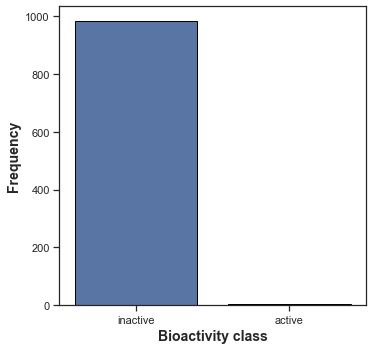

In [25]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

#### Scatter plot of MW versus LogP


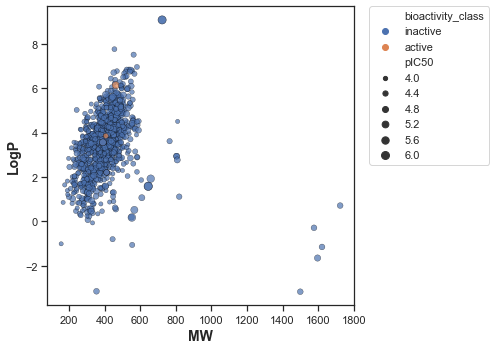

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### 

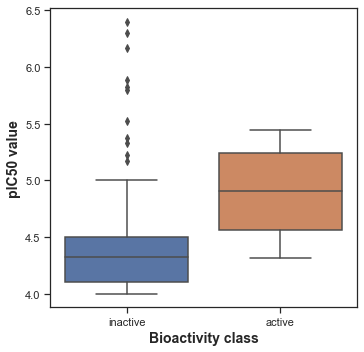

In [27]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [28]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_final[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_final[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [29]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,3283.5,0.020639,0.05,Different distribution (reject H0)


###  MW

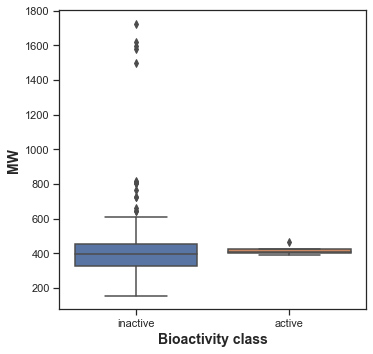

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')


In [31]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,2334.0,0.521048,0.05,Same distribution (fail to reject H0)


### LogP

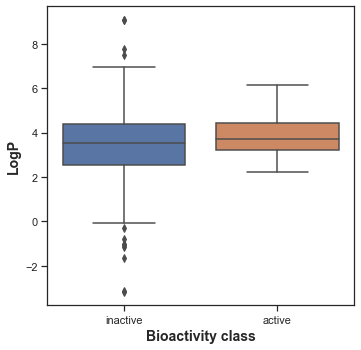

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [33]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2231.0,0.64488,0.05,Same distribution (fail to reject H0)


### NumHDonors

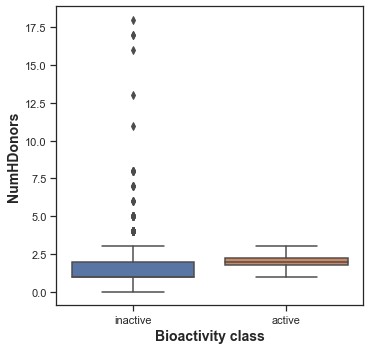

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')


In [35]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2483.5,0.347758,0.05,Same distribution (fail to reject H0)


### NumHAcceptors

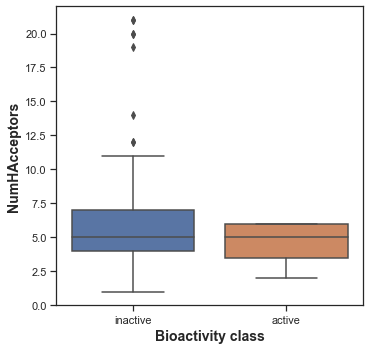

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [37]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1456.0,0.362314,0.05,Same distribution (fail to reject H0)
